## Final Project Submission

Please fill out:
* Student name: Reuben Hough
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Ahbineet Kulkarni
* Blog post URL:


In [1]:
# Importing useful libraries
import pandas as pd
import sqlite3
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading training dataset that was retrieved from kaggle
TrainSet = pd.read_csv('Tan_Train.csv', low_memory=False)
TestSet = pd.read_csv('Tan_Test.csv', low_memory=False)
Labels = pd.read_csv('Tan_Labels.csv')
TrainSet.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
# A lot of info is chopped off, so I'm making a
# function that doesn't cut off any columns
def display_all(df):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 1000):
            display(df)

In [4]:
display_all(TrainSet.head())

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
print(TrainSet.shape)
print(Labels.shape)

(59400, 40)
(59400, 2)


The status labels can be added to the training set using the id code

In [6]:
df = TrainSet.merge(Labels, on="id")

In [7]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [8]:
# isolate the year from date recorded
df['date_recorded']=pd.to_datetime(df.date_recorded)
df['year']=df.date_recorded.dt.year
df['year'].value_counts()

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: year, dtype: int64

There are very few dates before 2011, so I'm going to replace the date with 2011, the year with the most data.

In [9]:
df2 = df # Leaving a copy of the original dataframe
df2 = df2.where(df2['year'] > 2010, 2011)
df2['year'].value_counts()

2011    28705
2013    24271
2012     6424
Name: year, dtype: int64

In [10]:
df2['construction_year'].value_counts()

0       20695
2010     2645
2008     2611
2009     2530
2000     2091
2007     1586
2006     1470
2011     1286
2003     1286
2004     1123
2012     1084
2002     1075
1978     1036
1995     1014
2005     1010
1999      979
1998      966
1990      954
1985      944
1980      810
1996      810
1984      779
1982      744
1994      738
1972      708
1974      676
1997      643
1992      640
1993      607
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       87
1963       85
1968       77
1969       58
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [11]:
df3 = df2[df2.construction_year != 0]
df3.shape

(38705, 42)

It seems a third of the data has a zero for the construction date. It seems likely that this is an error, as ancient wells are not likely to be in operation today.

Mean Value for Construction column: 1996.8262756749773
Median Value for Construction column: 2000.0


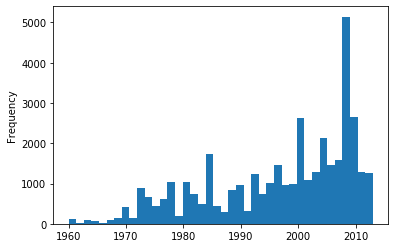

In [12]:
conmean = df3['construction_year'].mean()
conmedian = df3['construction_year'].median()
df3['construction_year'].plot(kind='hist', bins=40)

print("Mean Value for Construction column: {}".format(conmean))
print("Median Value for Construction column: {}".format(conmedian))

In [13]:
df4 = df2[df2.gps_height > 0]
df4.shape

(37480, 42)

With GPS, it's unlikely that so many wells exist at sea level. They would have to be at the coast, as no other point in Tanzania is at or below sea level.

Mean Value for GPS column: 1003.272626275675
Median Value for GPS column: 1155.0


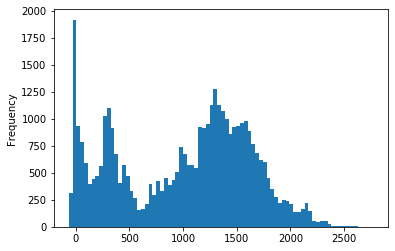

In [14]:
gpsmean = df3['gps_height'].mean()
gpsmedian = df3['gps_height'].median()
df3['gps_height'].plot(kind='hist', bins=80)

print("Mean Value for GPS column: {}".format(gpsmean))
print("Median Value for GPS column: {}".format(gpsmedian))

Neither height nor construction year lend themselves to simple replacement techniques, so I'm going to create multiple dataframes with different data replacement techniques and compare how each of them ultimately fares.

In [15]:
MeanReplaced = df2.where(df2['gps_height'] > 0, 1060)
MeanReplaced = MeanReplaced.where(MeanReplaced['construction_year'] > 0, 1997)
MedianReplaced = df2.where(df2['gps_height'] > 0, 1194)
MedianReplaced = MedianReplaced.where(MedianReplaced['construction_year'] > 0, 2000)

In [16]:
MedianReplaced.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    1340
gps_height                   0
installer                 1345
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                  10
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2260
recorded_by                  0
scheme_management         2229
scheme_name              13824
permit                    1927
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_